In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

### Load each country data

In [6]:
benin_df = pd.read_csv('benin_clean.csv')
sierra_df = pd.read_csv('sierraleone_clean.csv')
togo_df = pd.read_csv('togo_clean.csv')

# Add a column to identify each country's data
benin_df['country'] = 'Benin'
sierra_df['country'] = 'Sierra Leone'
togo_df['country'] = 'Togo'

# Combine them
df_all = pd.concat([benin_df, sierra_df, togo_df], ignore_index=True)

df_all.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier_flag,country
1576795,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,...,0.0,0.0,977,0,0.0,24.3,24.0,NaN,False,Togo
1576796,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,...,0.0,0.0,977,0,0.0,24.3,24.0,NaN,False,Togo
1576797,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,...,0.0,0.0,977,0,0.0,24.2,23.9,NaN,False,Togo
1576798,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,...,0.0,0.0,977,0,0.0,24.1,23.8,NaN,False,Togo
1576799,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,...,0.0,0.0,977,0,0.0,24.1,23.8,NaN,False,Togo


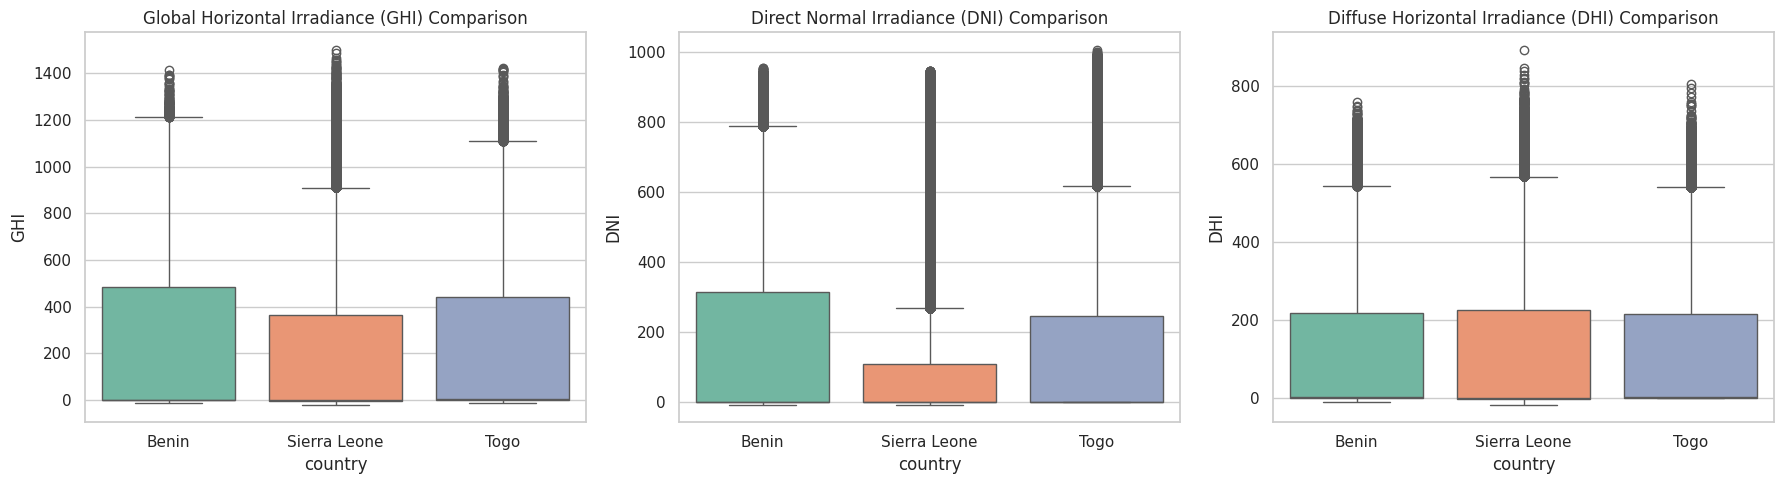

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# GHI boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x="country", y="GHI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Global Horizontal Irradiance (GHI) Comparison")
plt.legend([],[], frameon=False)

# DNI boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x="country", y="DNI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Direct Normal Irradiance (DNI) Comparison")
plt.legend([],[], frameon=False)  

# DHI boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x="country", y="DHI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Diffuse Horizontal Irradiance (DHI) Comparison")
plt.legend([],[], frameon=False) 

plt.tight_layout()
plt.show()

### Summary Table

In [8]:
# Group by country and calculate mean, median, and standard deviation
summary_stats = df_all.groupby("country")[["GHI", "DNI", "DHI"]].agg(
    ["mean", "median", "std"]
).round(2)

summary_stats = summary_stats.transpose()

# Display the summary table
summary_stats

country      Benin  Sierra Leone    Togo
GHI mean    240.56        201.96  230.56
    median    1.80          0.30    2.10
    std     331.13        298.50  322.53
DNI mean    167.19        116.38  151.26
    median   -0.10         -0.10    0.00
    std     261.71        218.65  250.96
DHI mean    115.36        113.72  116.44
    median    1.60         -0.10    2.50
    std     158.69        158.95  156.52

### Statistical Testing

In [9]:
# Split GHI by country
ghi_benin = df_all[df_all["country"] == "Benin"]["GHI"].dropna()
ghi_sierra = df_all[df_all["country"] == "Sierra Leone"]["GHI"].dropna()
ghi_togo = df_all[df_all["country"] == "Togo"]["GHI"].dropna()

f_stat, p_value = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("There IS a statistically significant difference in GHI between countries.")
else:
    print("No statistically significant difference in GHI between countries.")

F-statistic: 2090.093
P-value: 0.00000
There IS a statistically significant difference in GHI between countries.


### Key Observations

- Sierra Leone has the highest **median GHI**, indicating strong solar potential.
- Togo shows the **highest variability** in GHI, which may impact solar reliability.
- Benin's GHI is relatively consistent but slightly lower than Sierra Leone.

### Bonus – Bar Chart for Avg GHI

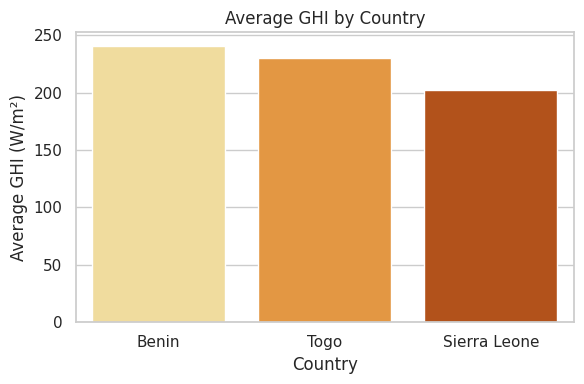

In [ ]:
avg_ghi = df_all.groupby("country")["GHI"].mean().reset_index().sort_values(by="GHI", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_ghi, x="country", y="GHI", hue="country", palette="YlOrBr", legend=False)
plt.title("Average GHI by Country")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()